# 데이터 12, 16번
- start.content	/ 콘텐츠 수강 시작	/ 콘텐츠 id / 콘텐츠 이용가, 콘텐츠 난이도	22년 8월부터 수집된 테이블
- end.content	/ 콘텐츠 수강 완료	/ 콘텐츠 id	/ 콘텐츠 내 모든 레슨를 시청하면 해당 테이블에 로그가 쌓임


## 데이터 이용 방안
- 두 데이터 merge -> 콘텐트 완료율, 콘텐트 평균 시작 - 완료 시간, 난이도별 완료 비율
- start 데이터 -> 인기가 많은 콘텐트, 유저가 수강하고 있는 콘텐트의 개수, 월별 콘텐트 시작 개수
- end 데이터 -> 어느 월, 요일에 주로 콘텐트를 끝낼까?

### Funnel, AARRR
- Funnel -> 활동 영역에 포함
- AARRR -> Activation, Retention에 치중

### 다른 데이터와 활용
- lesson 관련 데이터 -> 콘텐트는 몇 개의 레슨을 가지고 있는가? (평균)
- 회원가입 완료 후 / 결제 후 콘텐트 시작까지 걸리는 시간?
- 콘텐트를 끝낸 / 끝내지 않은 유저의 재구독을 차이?
- 콘텐트를 끝내지 않고 구독 취소한 사람

#### start.content와 complete.lesson 데이터를 기반으로 사용자별 콘텐츠 소비 경향 분석.
#### 수강 완료율, 인기 콘텐츠 파악 및 난이도와의 상관관계 분석.

- start.content
- enter.lesson_page
- complete.lesson
- end.content


In [1]:
import pandas as pd
import os
import datetime as dt
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib as mpl
pd.set_option('display.max_colwidth', None)
import glob

#### 데이터 전처리
- 기간 : 2023년 설정
- client_event_time -> datetime으로, 한국 시간으로!
- 컬럼 이름에 . 찍힌 거 _로 바꾸기
- 중복행 제거
- chrome headless 있으면 제거(크롤링일 가능성이 높아서)

-----------------------------------여기부터 다시 해야 함 -------------------------

#### start content (콘텐츠 수강 시작)

In [2]:
start_content = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/start_content.csv')
start_content.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-05 21:14:39.906000,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674000,South Korea,NaN,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585000,South Korea,NaN,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040000,Canada,NaN,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467000,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [3]:
start_content['client_event_time'] = pd.to_datetime(start_content['client_event_time'], errors='coerce')

In [4]:
print(start_content['client_event_time'].min())
print(start_content['client_event_time'].max())

2022-08-17 07:11:12.230000
2023-12-31 23:43:31.046000


In [5]:
print(start_content['client_event_time'].dtype)

datetime64[ns]


In [6]:
start_content['client_event_time'] = start_content['client_event_time'] + pd.Timedelta(hours=9)
start_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_carrier      0 non-null       float64       
 4   device_family       122690 non-null  object        
 5   device_type         120068 non-null  object        
 6   event_type          124917 non-null  object        
 7   language            122692 non-null  object        
 8   os_name             122671 non-null  object        
 9   os_version          122585 non-null  object        
 10  platform            122692 non-null  object        
 11  user_id             124917 non-null  object        
 12  content.id          124917 non-null  object        
 13  content.difficulty  124917 no

In [7]:
print(start_content['client_event_time'].min())
print(start_content['client_event_time'].max())

2022-08-17 16:11:12.230000
2024-01-01 08:43:31.046000


In [8]:
start_content.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-06 06:14:39.906,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-06 06:50:19.674,South Korea,NaN,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 23:06:26.585,South Korea,NaN,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 23:15:29.040,Canada,NaN,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 23:21:36.467,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [9]:
start_content.rename(columns={'content.id': 'content_id', 'content.difficulty': 'content_difficulty'}, inplace=True)
start_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_carrier      0 non-null       float64       
 4   device_family       122690 non-null  object        
 5   device_type         120068 non-null  object        
 6   event_type          124917 non-null  object        
 7   language            122692 non-null  object        
 8   os_name             122671 non-null  object        
 9   os_version          122585 non-null  object        
 10  platform            122692 non-null  object        
 11  user_id             124917 non-null  object        
 12  content_id          124917 non-null  object        
 13  content_difficulty  124917 no

In [10]:
start_content.drop(columns='device_carrier', inplace = True)

In [11]:
start_content.isna().sum()

city                  3900
client_event_time        0
country               2885
device_family         2227
device_type           4849
event_type               0
language              2225
os_name               2246
os_version            2332
platform              2225
user_id                  0
content_id               0
content_difficulty       0
dtype: int64

#### enter content page (콘텐츠 개별 페이지 진입)

In [12]:
enter_content_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_content_page.csv')
enter_content_page.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seoul,2023-04-05 21:40:35.740000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd
3,Daejeon,2023-04-05 21:14:25.355000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430
4,Seoul,2023-04-05 21:44:23.759000,South Korea,NaN,Samsung Phone,Samsung Galaxy S20 FE 5G,enter.content_page,Korean,Samsung Browser,14.2,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d


In [13]:
enter_content_page['client_event_time'] = pd.to_datetime(enter_content_page['client_event_time'], errors='coerce')
enter_content_page['client_event_time'] = enter_content_page['client_event_time'] + pd.Timedelta(hours=9)
enter_content_page.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seoul,2023-04-06 06:40:35.740,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-06 06:01:59.950,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-06 06:13:12.038,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd
3,Daejeon,2023-04-06 06:14:25.355,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430
4,Seoul,2023-04-06 06:44:23.759,South Korea,NaN,Samsung Phone,Samsung Galaxy S20 FE 5G,enter.content_page,Korean,Samsung Browser,14.2,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d


In [14]:
enter_content_page.rename(columns={'content.id': 'content_id'}, inplace=True)
enter_content_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_carrier     float64       
 4   device_family      object        
 5   device_type        object        
 6   event_type         object        
 7   language           object        
 8   os_name            object        
 9   os_version         object        
 10  platform           object        
 11  user_id            object        
 12  content_id         object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 189.9+ MB


In [15]:
enter_content_page.drop(columns='device_carrier', inplace = True)
enter_content_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
dtypes: datetime64[ns](1), object(11)
memory usage: 175.3+ MB


In [16]:
enter_content_page.isna().sum()

city                  30757
client_event_time         0
country                7570
device_family           639
device_type           23651
event_type                0
language                  0
os_name                 149
os_version             2549
platform                  0
user_id              465168
content_id                0
dtype: int64

#### enter lesson page (레슨 시작)

In [17]:
enter_lesson_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_lesson_page-001.csv')
enter_lesson_page.head()

C:\Users\syc09\AppData\Local\Temp\ipykernel_22268\631205377.py:1: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  enter_lesson_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_lesson_page-001.csv')


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-05 21:04:55.828000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-05 21:05:34.139000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


In [18]:
enter_lesson_page['client_event_time'] = pd.to_datetime(enter_lesson_page['client_event_time'], errors='coerce')
enter_lesson_page['client_event_time'] = enter_lesson_page['client_event_time'] + pd.Timedelta(hours=9)
enter_lesson_page.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,Wonju,2023-04-06 06:46:04.333,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-06 06:55:50.787,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-06 06:55:55.684,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-06 06:04:55.828,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-06 06:05:34.139,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


In [19]:
enter_lesson_page.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
enter_lesson_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_carrier     float64       
 4   device_family      object        
 5   device_type        object        
 6   event_type         object        
 7   language           object        
 8   os_name            object        
 9   os_version         object        
 10  platform           object        
 11  user_id            object        
 12  content_id         object        
 13  is_trial           object        
 14  lesson_id          object        
 15  is_free_trial      object        
dtypes: datetime64[ns](1), float64(1), object(14)
memory usage: 2.5+ GB


In [20]:
enter_lesson_page.drop(columns='device_carrier', inplace = True)
enter_lesson_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
 12  is_trial           object        
 13  lesson_id          object        
 14  is_free_trial      object        
dtypes: datetime64[ns](1), object(14)
memory usage: 2.4+ GB


In [21]:
enter_lesson_page.isna().sum()

city                   540130
client_event_time           0
country                358428
device_family            6482
device_type            141817
event_type                  0
language                    0
os_name                   417
os_version               6367
platform                    0
user_id               1538529
content_id                352
is_trial              7374020
lesson_id                   0
is_free_trial        18805949
dtype: int64

In [22]:
enter_lesson_page['is_free_trial'].value_counts()

is_free_trial
False    2154743
True       69015
Name: count, dtype: int64

#### complete lesson (레슨 완료)

In [23]:
complete_lesson = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/complete_lesson.csv')
complete_lesson.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,lesson.id
0,Wonju,2023-04-05 21:55:51.836000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-05 21:19:01.243000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-05 21:20:27.939000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-05 21:23:01.534000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-05 21:28:34.965000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


In [24]:
complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'], errors='coerce')
complete_lesson['client_event_time'] = complete_lesson['client_event_time'] + pd.Timedelta(hours=9)
complete_lesson.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,lesson.id
0,Wonju,2023-04-06 06:55:51.836,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-06 06:19:01.243,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-06 06:20:27.939,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-06 06:23:01.534,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-06 06:28:34.965,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


In [25]:
complete_lesson.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
complete_lesson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405069 entries, 0 to 5405068
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_carrier     float64       
 4   device_family      object        
 5   device_type        object        
 6   event_type         object        
 7   language           object        
 8   os_name            object        
 9   os_version         object        
 10  platform           object        
 11  user_id            object        
 12  content_id         object        
 13  lesson_id          object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 577.3+ MB


In [26]:
complete_lesson.drop(columns='device_carrier', inplace = True)
complete_lesson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405069 entries, 0 to 5405068
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
 12  lesson_id          object        
dtypes: datetime64[ns](1), object(12)
memory usage: 536.1+ MB


#### end content (콘텐츠 수강 완료)

In [27]:
end_content = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/end_content.csv')
end_content.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Yokohama,2023-04-10 14:02:10.600000,Japan,NaN,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 14:21:26.466000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 14:37:04.440000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 14:37:19.909000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 14:08:58.968000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


In [28]:
end_content['client_event_time'] = pd.to_datetime(end_content['client_event_time'], errors='coerce')
end_content['client_event_time'] = end_content['client_event_time'] + pd.Timedelta(hours=9)
end_content.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Yokohama,2023-04-10 23:02:10.600,Japan,NaN,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 23:21:26.466,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 23:37:04.440,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 23:37:19.909,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 23:08:58.968,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


In [29]:
print(end_content['client_event_time'].min())
print(end_content['client_event_time'].max())

2022-01-01 10:29:42.752000
2024-01-01 08:23:18.600000


In [30]:
end_content.rename(columns={'content.id': 'content_id'}, inplace=True)
end_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               116280 non-null  object        
 1   client_event_time  120582 non-null  datetime64[ns]
 2   country            117182 non-null  object        
 3   device_carrier     0 non-null       float64       
 4   device_family      119391 non-null  object        
 5   device_type        118866 non-null  object        
 6   event_type         120582 non-null  object        
 7   language           119392 non-null  object        
 8   os_name            119387 non-null  object        
 9   os_version         119362 non-null  object        
 10  platform           119392 non-null  object        
 11  user_id            120582 non-null  object        
 12  content_id         120582 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)

In [31]:
end_content.drop(columns='device_carrier', inplace = True)
end_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               116280 non-null  object        
 1   client_event_time  120582 non-null  datetime64[ns]
 2   country            117182 non-null  object        
 3   device_family      119391 non-null  object        
 4   device_type        118866 non-null  object        
 5   event_type         120582 non-null  object        
 6   language           119392 non-null  object        
 7   os_name            119387 non-null  object        
 8   os_version         119362 non-null  object        
 9   platform           119392 non-null  object        
 10  user_id            120582 non-null  object        
 11  content_id         120582 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 11.0+ MB


#### 레슨 시작, 완료 시간 평균

In [32]:
# 데이터를 병합
merged_data = pd.merge(
    enter_lesson_page, 
    complete_lesson, 
    on=['lesson_id', 'user_id'], 
    suffixes=('_start', '_end')
)

# 시작-완료 시간 차이
merged_data['time_difference'] = merged_data['client_event_time_end'] - merged_data['client_event_time_start']

# 각 lesson_id별 평균 시간
average_time_per_lesson = merged_data.groupby('lesson_id')['time_difference'].mean()

# 결과 출력
print(average_time_per_lesson)


lesson_id
001e4570bb0fc346a1c969b019bdc22b   -2 days +07:59:40.251566667
0021f3a8597cb32f3605631446baf526   -7 days +17:13:49.879569862
0022b56713250709e3e8f06ec6c2a76e   -4 days +03:52:14.293905150
00332b815a82ca3244f1e1eb72345390   -2 days +09:20:19.354512346
00375453dc564db84a8ae379afdd8f1c     0 days 00:09:48.762317460
                                               ...            
ffb7d5621f957059f58a72f036d5e3bd   -4 days +21:01:41.968810131
ffc6e445405214ad2cddc6f82620f80b   -1 days +16:15:02.843360656
ffeafc77194d3fab7394865a0e02dd0f     0 days 08:43:53.935958333
fff51991e89837d9d4ae49d398f8c46b   -5 days +16:59:30.206930421
fff98826d795b2d116f082a78c25fe64   -4 days +12:38:45.276153144
Name: time_difference, Length: 5038, dtype: timedelta64[ns]


In [33]:
average_time_per_lesson.sort_values(ascending=False)

lesson_id
91100062eadc029b54159c173e13f3f3    253 days 04:06:36.370246576
23376faa5f9c824ce486c459209b51b1    149 days 10:26:06.710944444
9149518042a9321070681792b7111c06     37 days 10:02:09.814406250
8ef846e922d6e7618687fda9fb5e9293     34 days 21:23:35.527385270
ec09a9ac75b93ddc5a7557cc0011cb14     30 days 00:26:39.327833333
                                               ...             
c7f0aad489eb0e082b8b380c0c2b3a57   -25 days +05:57:09.111731753
21fe86f0b8644f347e8497e294cd35d4   -26 days +20:56:20.602285715
4269233f7599c0e9882984aaeb9f2f57   -27 days +23:10:01.275411765
82bee3289755a84765ab686abb3babcc   -27 days +19:35:20.661847826
7daf48201824b93dbe495fdda0aad1eb   -28 days +15:08:29.195409091
Name: time_difference, Length: 5038, dtype: timedelta64[ns]

#### 콘텐츠 시작 끝

In [34]:
# 데이터를 병합
merged_data = pd.merge(
    start_content, 
    end_content, 
    on=['content_id', 'user_id'], 
    suffixes=('_start', '_end')
)

# 시작-완료 시간 차이
merged_data['time_difference'] = merged_data['client_event_time_end'] - merged_data['client_event_time_start']

# 각 lesson_id별 평균 시간
average_time_per_content = merged_data.groupby('content_id')['time_difference'].mean()

# 결과 출력
print(average_time_per_content)

content_id
03b4a290c08f7fa83933827a994f2e61    7 days 15:28:17.986725490
0ab2b890d4068c1490b89676773256f6   15 days 17:57:23.460573770
101e1d0dcc38d9c86156f008a145083e   15 days 17:50:32.777346341
123715e9b63b3efb32cdcd947ea96aaf   12 days 01:30:58.045164179
165def8885b8a2ec0c92404048d7e345   15 days 09:09:37.742082125
                                              ...            
f6f082e10dc9c1061cb809989b361d9c   16 days 02:28:21.967441441
f8b0ca043f5f0437603142ae93e6a424   18 days 14:20:30.530797468
fc3051206e08a57bc14fa52a7eec904b       4 days 10:06:20.282000
fc6a9e04f693ea724c55153d1ae82c65       0 days 00:48:48.410000
ff7998135d650dbefb3f479c900cbcc7    4 days 17:05:01.186952565
Name: time_difference, Length: 114, dtype: timedelta64[ns]


In [35]:
average_time_per_lesson.sort_values(ascending=False)

lesson_id
91100062eadc029b54159c173e13f3f3    253 days 04:06:36.370246576
23376faa5f9c824ce486c459209b51b1    149 days 10:26:06.710944444
9149518042a9321070681792b7111c06     37 days 10:02:09.814406250
8ef846e922d6e7618687fda9fb5e9293     34 days 21:23:35.527385270
ec09a9ac75b93ddc5a7557cc0011cb14     30 days 00:26:39.327833333
                                               ...             
c7f0aad489eb0e082b8b380c0c2b3a57   -25 days +05:57:09.111731753
21fe86f0b8644f347e8497e294cd35d4   -26 days +20:56:20.602285715
4269233f7599c0e9882984aaeb9f2f57   -27 days +23:10:01.275411765
82bee3289755a84765ab686abb3babcc   -27 days +19:35:20.661847826
7daf48201824b93dbe495fdda0aad1eb   -28 days +15:08:29.195409091
Name: time_difference, Length: 5038, dtype: timedelta64[ns]

#### user_id가 null 값이 아닌 사람 기준 평균 몇 개의 콘텐츠, 레슨을 수강했나?

In [36]:
enter_lesson_page.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
0,Wonju,2023-04-06 06:46:04.333,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-06 06:55:50.787,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-06 06:55:55.684,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-06 06:04:55.828,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-06 06:05:34.139,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


In [37]:
# user_id가 null 값이 아닌 거 필터링링 
enter_lesson_page_user_notnull = enter_lesson_page[enter_lesson_page['user_id'].notnull()]

In [38]:
# user_id가 중복된 값을 하나만 남기고 삭제
# 한 유저가 여러개 들었을 수도 있으니 이거는 남겨야 할 듯 하다.
how_many_user = enter_lesson_page_user_notnull.drop_duplicates(subset='user_id')
how_many_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113920 entries, 0 to 21029706
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               111348 non-null  object        
 1   client_event_time  113920 non-null  datetime64[ns]
 2   country            113279 non-null  object        
 3   device_family      113920 non-null  object        
 4   device_type        110017 non-null  object        
 5   event_type         113920 non-null  object        
 6   language           113920 non-null  object        
 7   os_name            113920 non-null  object        
 8   os_version         113580 non-null  object        
 9   platform           113920 non-null  object        
 10  user_id            113920 non-null  object        
 11  content_id         113920 non-null  object        
 12  is_trial           72793 non-null   object        
 13  lesson_id          113920 non-null  object     

In [39]:
# 각 user_id별로 content_id 개수 세기 nunique 때문에 어차피 null 값 빠지긴 할 것임임
content_count_per_user = enter_lesson_page_user_notnull.groupby('user_id')['content_id'].nunique()

# 전체 user_id에 대해 평균 content_id 수 계산
average_content_per_user = content_count_per_user.mean().round(1)

# 결과 출력
print(f'유저 한 명당 수강하는 content 개수 : {average_content_per_user}')

유저 한 명당 수강하는 content 개수 : 2.9


In [40]:
# 각 user_id별로 lesson_id 개수 세기
lesson_count_per_user = enter_lesson_page.groupby('user_id')['lesson_id'].nunique()

# 전체 user_id에 대해 평균 lesson_id 수 계산
average_lesson_per_user = lesson_count_per_user.mean().round(1)

# 결과 출력
print(f'유저 한 명당 수강하는 lesson 개수 : {average_lesson_per_user}')

유저 한 명당 수강하는 lesson 개수 : 48.4


#### 시작, 끝을 머지해서 콘텐츠를 끝까지 완료한 것과 끝을 맺지 않은 것을 추려낸다.

#### 제일 인기 많은 content

In [41]:
start_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
0,Daejeon,2023-04-06 06:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-06 06:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 23:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 23:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 23:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [42]:
start_content[start_content.duplicated()]

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty


In [43]:
start_content.isna().sum()

city                  3900
client_event_time        0
country               2885
device_family         2227
device_type           4849
event_type               0
language              2225
os_name               2246
os_version            2332
platform              2225
user_id                  0
content_id               0
content_difficulty       0
dtype: int64

In [44]:
duplicated_user_ids = start_content[start_content['user_id'].duplicated()]
duplicated_user_ids.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
17,Suwon,2023-04-10 23:29:36.420,South Korea,Apple iPhone,Apple iPhone,start.content,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,68a3658f1b936bfff3bd6960cd561b0a,beginner
39,Daejeon,2023-04-12 20:25:05.325,South Korea,Mac,Mac,start.content,Korean,Chrome,111.0.0.0,Web,c8594f8fb24fb61313408f1b54b8a442,220ce7873b8895d0c81c37600b5bd1e7,advanced
41,Gangnam-gu,2023-04-12 20:56:46.656,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,57e80cdcfe78950e01e582e7a63847f9,d6227ba76134f6cf821bb98b5f235bd0,intermediate
42,Gangnam-gu,2023-04-12 20:59:41.325,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,57e80cdcfe78950e01e582e7a63847f9,f64c475280676531a31f2f8e0648599c,intermediate
49,Suseong-gu,2023-05-28 03:08:11.346,South Korea,Windows,Windows,start.content,Korean,Chrome,113.0.0.0,Web,08ebb0b2858b5a1bc1f496a29735c54b,c269eb6df3a374b464f7c18f12fa398f,advanced


In [45]:
# user_id별로 각 content_id가 몇 번 선택되었는지 계산
content_user_count = start_content.groupby('content_id')['user_id'].nunique()

# 제일 많은 user_id가 선택한 content_id 찾기
most_selected_content = content_user_count.idxmax()
most_selected_count = content_user_count.max()

# 결과 출력
print(f"제일 많은 user가 선택한 content_id: {most_selected_content}")
print(f"선택된 user 수: {most_selected_count}")

제일 많은 user가 선택한 content_id: f4be1a0fe0e301b03115591777fddf29
선택된 user 수: 24993


In [151]:
content_user_count = content_user_count.to_frame()

In [155]:
content_user_count = content_user_count.sort_values(by = 'user_id', ascending = False)
content_user_count.head(10)

,user_id
content_id,
f4be1a0fe0e301b03115591777fddf29,24850
61b6463287573f00de13a930805a52d6,15064
f491517f4737a60d661cd1fcacc702c0,5607
68a3658f1b936bfff3bd6960cd561b0a,5533
445fac33232adcb3d1cdab7d8a579430,4688
595cb4bbfc83e683b0314ca1312cfbde,4122
c269eb6df3a374b464f7c18f12fa398f,3436
b314d5aba64a0aab40602cb72a4a1504,2967
d6227ba76134f6cf821bb98b5f235bd0,2438


In [46]:
print(start_content['client_event_time'].min())
print(start_content['client_event_time'].max())

2022-08-17 16:11:12.230000
2024-01-01 08:43:31.046000


In [47]:
# 'client_event_time'에서 연도 추출
start_content['year'] = start_content['client_event_time'].dt.year

# 각 연도별로 가장 많이 선택된 content_id 찾기
most_selected_per_year = start_content.groupby(['year', 'content_id'])['user_id'].nunique()

# 2022년, 2023년 각각 제일 많이 선택된 content_id 찾기

most_selected_2022 = most_selected_per_year[2022].idxmax()
most_selected_2023 = most_selected_per_year[2023].idxmax()

# 각 연도별 제일 많이 선택된 content_id와 선택된 user 수 출력

print(f"2022년 제일 많이 선택된 content_id: {most_selected_2022}, 선택된 user 수: {most_selected_per_year[2022].max()}")
print(f"2023년 제일 많이 선택된 content_id: {most_selected_2023}, 선택된 user 수: {most_selected_per_year[2023].max()}")


2022년 제일 많이 선택된 content_id: 61b6463287573f00de13a930805a52d6, 선택된 user 수: 2156
2023년 제일 많이 선택된 content_id: f4be1a0fe0e301b03115591777fddf29, 선택된 user 수: 23367


- 저 콘텐트가 뭔지는 모르겠으나 트렌드 변화가 있었을 수도 있지 않나

In [48]:
most_selected_per_year[2022].sort_values(ascending = False)

content_id
61b6463287573f00de13a930805a52d6    2156
f4be1a0fe0e301b03115591777fddf29    1619
f491517f4737a60d661cd1fcacc702c0    1266
68a3658f1b936bfff3bd6960cd561b0a     929
7cebec6e79cc981dbf421c5ec2aedd9d     856
                                    ... 
1ef5b2110beb650ffa214ace6168ebd7       1
62d828507e08a225242afb285de123fb       1
66fbc8fa22ac46a73eb3dfe499d270a7       1
36188744af2a903bddc6124cfc1306d4       1
bbdfda2eda84b1d51c43288a175f6e8c       1
Name: user_id, Length: 83, dtype: int64

In [49]:
most_selected_per_year[2023].sort_values(ascending = False)

content_id
f4be1a0fe0e301b03115591777fddf29    23367
61b6463287573f00de13a930805a52d6    13031
445fac33232adcb3d1cdab7d8a579430     4692
68a3658f1b936bfff3bd6960cd561b0a     4628
f491517f4737a60d661cd1fcacc702c0     4343
                                    ...  
df194933b9a0c30b335ef3ce810d1991        1
359a1753011f6f92f13dd7d8acdd35f2        1
572ece126778c2a4de268f59f92f0edd        1
5d922c8a6e9e437e7735aa1376bd79ff        1
d4466fc8e5fb21a89472b25addf369a5        1
Name: user_id, Length: 150, dtype: int64

In [50]:
start_content[start_content['content_id'] == '61b6463287573f00de13a930805a52d6']

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty,year
2,Seoul,2023-04-10 23:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner,2023
3,Toronto,2023-04-10 23:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner,2023
5,Yongin-si,2023-04-10 23:07:01.134,South Korea,Windows,Windows,start.content,Korean,Chrome,112.0.0.0,Web,649e32570ee5349aa8868024aeabb54f,61b6463287573f00de13a930805a52d6,beginner,2023
15,Seo-gu,2023-04-10 23:48:07.824,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,61b6463287573f00de13a930805a52d6,beginner,2023
16,Suwon,2023-04-10 23:28:18.057,South Korea,Apple iPhone,Apple iPhone,start.content,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,61b6463287573f00de13a930805a52d6,beginner,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124877,NaN,2023-12-29 22:32:40.626,NaN,NaN,NaN,start.content,NaN,NaN,NaN,NaN,8ff47bbaceb5b0a833e16db47fff5981,61b6463287573f00de13a930805a52d6,beginner,2023
124878,NaN,2023-12-29 22:59:41.582,NaN,NaN,NaN,start.content,NaN,NaN,NaN,NaN,f30d8c084feb39b2d080b8b48a08cb4e,61b6463287573f00de13a930805a52d6,beginner,2023
124896,Nam-gu,2023-10-30 09:47:51.765,South Korea,Windows,Windows,start.content,Korean,Chrome,118.0.0.0,Web,abbbd148a36627be67a0e9a689a935ab,61b6463287573f00de13a930805a52d6,beginner,2023
124903,Goyang-si,2023-10-30 09:32:42.903,South Korea,Apple iPhone,Apple iPhone,start.content,Korean,WebKit,605.1.15,Web,e3437d1e1cbdaec01b09a617dd02a1f1,61b6463287573f00de13a930805a52d6,beginner,2023


In [51]:
start_content[start_content['content_id'] == 'f4be1a0fe0e301b03115591777fddf29']

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty,year
1,Seoul,2023-04-06 06:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner,2023
21,Songpa-gu,2023-01-13 04:28:50.217,South Korea,Apple iPad,Apple iPad,start.content,Korean,Chrome,108.0.5359.112,Web,2782298276dc633ec3381f39e5475e56,f4be1a0fe0e301b03115591777fddf29,beginner,2023
22,Dong-gu,2023-01-13 04:09:56.045,South Korea,Windows,Windows,start.content,Korean,Edge,108.0.1462.76,Web,8fb0b006096f62f3bb5dca7cdfbb1443,f4be1a0fe0e301b03115591777fddf29,beginner,2023
30,Mapo-gu,2023-03-12 17:36:03.935,South Korea,Mac,Mac,start.content,Korean,Chrome,111.0.0.0,Web,2a77d317eb02050315ca202de6facaa2,f4be1a0fe0e301b03115591777fddf29,beginner,2023
43,Namyangju,2023-04-12 20:16:50.205,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,b174fbd23024e6350b092a57925d46b0,f4be1a0fe0e301b03115591777fddf29,beginner,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124897,Seoul,2023-10-30 09:19:16.450,South Korea,Windows,Windows,start.content,Korean,Edge,118.0.2088.69,Web,f0e5afe8416f5c417b3672829947910d,f4be1a0fe0e301b03115591777fddf29,beginner,2023
124901,Changwon,2023-10-30 09:44:51.335,South Korea,Windows,Windows,start.content,Korean,Chrome,118.0.0.0,Web,9caae7c978a29463ce2c368b287bb7dd,f4be1a0fe0e301b03115591777fddf29,beginner,2023
124902,Goyang-si,2023-10-30 09:17:51.210,South Korea,Apple iPhone,Apple iPhone 14 Pro,start.content,Korean,Instagram,305.0.0.16.118,Web,e3437d1e1cbdaec01b09a617dd02a1f1,f4be1a0fe0e301b03115591777fddf29,beginner,2023
124905,Ansan-si,2023-10-30 09:23:49.678,South Korea,Mac,Mac,start.content,Korean,Chrome,118.0.0.0,Web,43467a400a8c9e785cac46e30936671d,f4be1a0fe0e301b03115591777fddf29,beginner,2023


In [52]:
complete_subscription = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/complete_subscription.csv')
complete_subscription.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nowon-gu,2023-04-05 21:40:04.000000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008000,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 11:35:01.865000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 01:25:55.820000,South Korea,NaN,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


In [53]:
# 중복된 user_id 필터링
complete_subscription[complete_subscription['user_id'].duplicated()]['user_id']



179      e842a8c98af30bc014efcea459a98b97
1057     9dd5b05df44ae64e2883b874485338c0
1087     c5087a941da4a7f8721fa4bc1923c253
1241     ee18763162fd4ea36099e3d028176488
1320     f750f507d8a2c1db7da2a0e9af74a3d0
                       ...               
14161    e878163856cdac57985dae65831aa0fe
14234    d33975e1b7430a21e29675807e15cf57
14248    f833cca4c382ac8c502c6f99bc432725
14277    433a7b7ae0c58e7badd304d9b0209e26
14288    9eec721a1a1406bcf623272b5f761ce6
Name: user_id, Length: 408, dtype: object

In [54]:
complete_subscription[complete_subscription['user_id'] == '433a7b7ae0c58e7badd304d9b0209e26']

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
10408,Dongjak-gu,2023-12-19 10:05:45.389000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,complete.subscription,Korean,Chrome WebView,120.0.6099.43,Web,433a7b7ae0c58e7badd304d9b0209e26,95520,95520,0,A
14277,Gwangmyeong,2023-11-16 13:37:40.742000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,complete.subscription,Korean,Chrome WebView,119.0.6045.66,Web,433a7b7ae0c58e7badd304d9b0209e26,131600,131600,0,A


In [55]:
# 중복된 행 필터링
complete_subscription[complete_subscription.duplicated()]

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
4261,Wonju,2022-11-18 09:50:01.773000,South Korea,NaN,Android,Android,complete.subscription,Korean,Chrome WebView,90,Web,2445f306cf5fd79dc448f8dd874ac2f3,15920,15920,0,NaN
9641,Suwon,2022-11-10 05:30:01.737000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,743b71e5e143bebe55dc39c03c6c36da,15920,15920,0,NaN


#### 회원가입률?

In [56]:
# non_user enter_mainpage /complete_signup
enter_main_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_payment_page.csv')
enter_main_page.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935000,South Korea,NaN,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632000,South Korea,NaN,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


In [57]:
enter_main_page_user_notnull = enter_main_page[enter_main_page['user_id'].notnull()]
enter_main_page_user_notnull

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935000,South Korea,NaN,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632000,South Korea,NaN,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
...,...,...,...,...,...,...,...,...,...,...,...,...
165056,Seoul,2023-10-10 05:35:10.862000,South Korea,NaN,Mac,Mac,enter.payment_page,Korean,Safari,16.3,Web,0d507104136f139cbc9f6fa1db365162
165057,Hanam,2023-10-10 05:33:29.633000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,116.0.0.0,Web,298e200203472e5bc0f9a14053e1dfe1
165058,Hanam,2023-10-10 05:33:29.691000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,116.0.0.0,Web,298e200203472e5bc0f9a14053e1dfe1
165059,Seoul,2023-10-10 05:50:08.748000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Edge,117.0.2045.47,Web,4252b7d6d08c1ba797ec2f5d0b244963


In [58]:
enter_main_page_user_null = enter_main_page[enter_main_page['user_id'].isna()]
enter_main_page_user_null

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
23,Seo-gu,2023-03-12 08:45:23.016000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Whale,3.19.166.16,Web,NaN
61,Seoul,2023-01-24 21:14:48.351000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.payment_page,Korean,Mobile Safari,16.0,Web,NaN
224,Hanover,2023-02-18 04:47:45.642000,United States,NaN,Mac,Mac,enter.payment_page,English,Chrome,109.0.0.0,Web,NaN
225,Bucheon-si,2023-02-18 04:25:16.663000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,110.0.0.0,Web,NaN
226,Wonju,2023-02-18 04:17:02.057000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,110.0.0.0,Web,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
165004,Uijeongbu-si,2023-10-15 22:44:03.217000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.payment_page,Korean,GSA,285.0.570543384,Web,NaN
165021,Gangnam-gu,2023-10-30 00:28:17.246000,South Korea,NaN,Samsung Galaxy Phone,Samsung Galaxy S7,enter.payment_page,Korean,Chrome WebView,115.0.5790.166,Web,NaN
165022,Gangnam-gu,2023-10-30 00:28:20.602000,South Korea,NaN,Samsung Galaxy Phone,Samsung Galaxy S7,enter.payment_page,Korean,Chrome WebView,115.0.5790.166,Web,NaN
165033,Seongbuk-gu,2023-10-10 05:25:11.898000,South Korea,NaN,K,NaN,enter.payment_page,Korean,Chrome,116.0.0.0,Web,NaN


In [59]:
enter_main_page_user_null.reset_index(inplace = True)
enter_main_page_user_null.drop(columns='index')

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seo-gu,2023-03-12 08:45:23.016000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Whale,3.19.166.16,Web,NaN
1,Seoul,2023-01-24 21:14:48.351000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.payment_page,Korean,Mobile Safari,16.0,Web,NaN
2,Hanover,2023-02-18 04:47:45.642000,United States,NaN,Mac,Mac,enter.payment_page,English,Chrome,109.0.0.0,Web,NaN
3,Bucheon-si,2023-02-18 04:25:16.663000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,110.0.0.0,Web,NaN
4,Wonju,2023-02-18 04:17:02.057000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,110.0.0.0,Web,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6222,Uijeongbu-si,2023-10-15 22:44:03.217000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.payment_page,Korean,GSA,285.0.570543384,Web,NaN
6223,Gangnam-gu,2023-10-30 00:28:17.246000,South Korea,NaN,Samsung Galaxy Phone,Samsung Galaxy S7,enter.payment_page,Korean,Chrome WebView,115.0.5790.166,Web,NaN
6224,Gangnam-gu,2023-10-30 00:28:20.602000,South Korea,NaN,Samsung Galaxy Phone,Samsung Galaxy S7,enter.payment_page,Korean,Chrome WebView,115.0.5790.166,Web,NaN
6225,Seongbuk-gu,2023-10-10 05:25:11.898000,South Korea,NaN,K,NaN,enter.payment_page,Korean,Chrome,116.0.0.0,Web,NaN


In [60]:
enter_main_page_user_null.head()

,index,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,23,Seo-gu,2023-03-12 08:45:23.016000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Whale,3.19.166.16,Web,NaN
1,61,Seoul,2023-01-24 21:14:48.351000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.payment_page,Korean,Mobile Safari,16.0,Web,NaN
2,224,Hanover,2023-02-18 04:47:45.642000,United States,NaN,Mac,Mac,enter.payment_page,English,Chrome,109.0.0.0,Web,NaN
3,225,Bucheon-si,2023-02-18 04:25:16.663000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,110.0.0.0,Web,NaN
4,226,Wonju,2023-02-18 04:17:02.057000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,110.0.0.0,Web,NaN


In [61]:
enter_main_page.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337000,South Korea,NaN,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935000,South Korea,NaN,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632000,South Korea,NaN,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


In [62]:
enter_main_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165061 entries, 0 to 165060
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               162362 non-null  object 
 1   client_event_time  165061 non-null  object 
 2   country            164899 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      165060 non-null  object 
 5   device_type        159066 non-null  object 
 6   event_type         165061 non-null  object 
 7   language           165061 non-null  object 
 8   os_name            165061 non-null  object 
 9   os_version         164560 non-null  object 
 10  platform           165061 non-null  object 
 11  user_id            158834 non-null  object 
dtypes: float64(1), object(11)
memory usage: 15.1+ MB


#### complete_signup (회원가입 완료)

In [63]:
complete_signup = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/complete_signup.csv')
complete_signup.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-05 21:33:26.068000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-05 21:45:18.672000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 14:47:56.424000,South Korea,NaN,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 14:25:45.920000,South Korea,NaN,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 14:09:50.698000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao


In [64]:
complete_signup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               44774 non-null   object 
 1   client_event_time  145133 non-null  object 
 2   country            45756 non-null   object 
 3   device_carrier     0 non-null       float64
 4   device_family      45767 non-null   object 
 5   device_type        44659 non-null   object 
 6   event_type         145133 non-null  object 
 7   language           45767 non-null   object 
 8   os_name            45745 non-null   object 
 9   os_version         45651 non-null   object 
 10  platform           45767 non-null   object 
 11  user_id            145133 non-null  object 
 12  type               144958 non-null  object 
dtypes: float64(1), object(12)
memory usage: 14.4+ MB


In [65]:
complete_signup['client_event_time'] = pd.to_datetime(complete_signup['client_event_time'], errors='coerce')
complete_signup['client_event_time'] = complete_signup['client_event_time'] + pd.Timedelta(hours=9)
complete_signup.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-06 06:33:26.068,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-06 06:45:18.672,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 23:47:56.424,South Korea,NaN,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 23:25:45.920,South Korea,NaN,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 23:09:50.698,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao


In [66]:
complete_signup.drop(columns='device_carrier', inplace = True)

In [67]:
complete_signup.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-06 06:33:26.068,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-06 06:45:18.672,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 23:47:56.424,South Korea,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 23:25:45.920,South Korea,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 23:09:50.698,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao


In [68]:
complete_signup.isna().sum()

city                 100359
client_event_time         0
country               99377
device_family         99366
device_type          100474
event_type                0
language              99366
os_name               99388
os_version            99482
platform              99366
user_id                   0
type                    175
dtype: int64

In [69]:
complete_signup[complete_signup.duplicated()]

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type


In [70]:
# 연도-월(period) 컬럼 생성
complete_signup['period'] = complete_signup['client_event_time'].dt.to_period('M').astype(str)

# 2022-01부터 2023-12까지 필터링
filtered_data = complete_signup[
    (complete_signup['period'] >= '2022-01') & (complete_signup['period'] <= '2023-12')
]

# 월별 signup_count 계산
monthly_signup_counts = filtered_data.groupby('period').size().reset_index(name='signup_count')

# 결과 출력
monthly_signup_counts

,period,signup_count
0,2022-01,7306
1,2022-02,4670
2,2022-03,5617
3,2022-04,4726
4,2022-05,5011
5,2022-06,5547
6,2022-07,4402
7,2022-08,3393
8,2022-09,2944
9,2022-10,2836


#### enter_main_page (메인페이지 진입)

In [71]:
enter_main_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_main_page.csv')
enter_main_page.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-05 21:04:28.967000,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-05 21:01:31.258000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-05 21:02:50.374000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-05 21:30:33.727000,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN


In [72]:
enter_main_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133548 entries, 0 to 2133547
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
dtypes: float64(1), object(11)
memory usage: 195.3+ MB


In [73]:
enter_main_page['client_event_time'] = pd.to_datetime(enter_main_page['client_event_time'], errors='coerce')
enter_main_page['client_event_time'] = enter_main_page['client_event_time'] + pd.Timedelta(hours=9)
enter_main_page.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-06 06:55:06.140,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-06 06:04:28.967,South Korea,NaN,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-06 06:01:31.258,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-06 06:02:50.374,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-06 06:30:33.727,South Korea,NaN,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN


In [74]:
enter_main_page.drop(columns='device_carrier', inplace = True)

In [75]:
enter_main_page[enter_main_page['user_id'].isna()]

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-06 06:55:06.140,South Korea,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
2,Hwaseong-si,2023-04-06 06:01:31.258,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-06 06:02:50.374,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-06 06:30:33.727,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN
5,Sejong,2023-04-06 06:36:02.749,South Korea,Apple iPhone,Apple iPhone 12 Mini,enter.main_page,Korean,Instagram,276.1.0.14.103,Web,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2133543,Jeongeup,2023-10-10 14:53:29.283,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133544,Jeongeup,2023-10-10 14:54:17.572,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133545,Gangnam-gu,2023-10-10 14:54:33.164,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,117.0.0.0,Web,NaN
2133546,Saha-gu,2023-10-10 14:58:15.175,South Korea,Samsung Phone,Samsung Galaxy S23+,enter.main_page,Korean,Instagram,303.0.0.40.109,Web,NaN


In [76]:
len(enter_main_page)

2133548

In [77]:
# period 컬럼 생성
enter_main_page['period'] = enter_main_page['client_event_time'].dt.to_period('M').astype(str)

# 2022-01부터 2023-12까지 필터링
filtered_data = enter_main_page[
    (enter_main_page['period'] >= '2022-01') & (enter_main_page['period'] <= '2023-12')
]

# 월별 user_count와 non_user_count 계산
monthly_counts = filtered_data.groupby('period').apply(
    lambda x: pd.Series({
        'user_count': x['user_id'].notnull().sum(),      # user_id가 null이 아닌 행의 개수
        'non_user_count': x['user_id'].isnull().sum()   # user_id가 null인 행의 개수
    })
).reset_index()

# 결과 출력
monthly_counts


C:\Users\syc09\AppData\Local\Temp\ipykernel_22268\2733275310.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_counts = filtered_data.groupby('period').apply(


,period,user_count,non_user_count
0,2022-01,49587,27604
1,2022-02,52250,60159
2,2022-03,50858,60403
3,2022-04,39664,46612
4,2022-05,39307,47293
5,2022-06,42615,51554
6,2022-07,41906,40260
7,2022-08,23111,36504
8,2022-09,17845,28858
9,2022-10,15540,28024


In [78]:
# total_count 컬럼 추가
monthly_counts['total_count'] = monthly_counts['user_count'] + monthly_counts['non_user_count']

# 결과 출력
monthly_counts


,period,user_count,non_user_count,total_count
0,2022-01,49587,27604,77191
1,2022-02,52250,60159,112409
2,2022-03,50858,60403,111261
3,2022-04,39664,46612,86276
4,2022-05,39307,47293,86600
5,2022-06,42615,51554,94169
6,2022-07,41906,40260,82166
7,2022-08,23111,36504,59615
8,2022-09,17845,28858,46703
9,2022-10,15540,28024,43564


In [79]:
main_page_monthly = monthly_counts.copy()

In [80]:
monthly_signup_counts

,period,signup_count
0,2022-01,7306
1,2022-02,4670
2,2022-03,5617
3,2022-04,4726
4,2022-05,5011
5,2022-06,5547
6,2022-07,4402
7,2022-08,3393
8,2022-09,2944
9,2022-10,2836


In [81]:
main_page_monthly_signup_merge = pd.merge(
    main_page_monthly,
    monthly_signup_counts,
    on='period',  # 기준 컬럼
    how='left'    # left join을 사용하여 main_page_monthly 기준으로 병합
)

# 결과 출력
main_page_monthly_signup_merge


,period,user_count,non_user_count,total_count,signup_count
0,2022-01,49587,27604,77191,7306
1,2022-02,52250,60159,112409,4670
2,2022-03,50858,60403,111261,5617
3,2022-04,39664,46612,86276,4726
4,2022-05,39307,47293,86600,5011
5,2022-06,42615,51554,94169,5547
6,2022-07,41906,40260,82166,4402
7,2022-08,23111,36504,59615,3393
8,2022-09,17845,28858,46703,2944
9,2022-10,15540,28024,43564,2836


In [82]:
main_page_monthly_signup_merge['complete_signup/non_user_enter_main_page'] = round(main_page_monthly_signup_merge['signup_count'] / main_page_monthly_signup_merge['non_user_count'], 1)

In [83]:
main_page_monthly_signup_merge

,period,user_count,non_user_count,total_count,signup_count,complete_signup/non_user_enter_main_page
0,2022-01,49587,27604,77191,7306,0.3
1,2022-02,52250,60159,112409,4670,0.1
2,2022-03,50858,60403,111261,5617,0.1
3,2022-04,39664,46612,86276,4726,0.1
4,2022-05,39307,47293,86600,5011,0.1
5,2022-06,42615,51554,94169,5547,0.1
6,2022-07,41906,40260,82166,4402,0.1
7,2022-08,23111,36504,59615,3393,0.1
8,2022-09,17845,28858,46703,2944,0.1
9,2022-10,15540,28024,43564,2836,0.1


In [84]:
start_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_family       122690 non-null  object        
 4   device_type         120068 non-null  object        
 5   event_type          124917 non-null  object        
 6   language            122692 non-null  object        
 7   os_name             122671 non-null  object        
 8   os_version          122585 non-null  object        
 9   platform            122692 non-null  object        
 10  user_id             124917 non-null  object        
 11  content_id          124917 non-null  object        
 12  content_difficulty  124917 non-null  object        
 13  year                124917 no

In [85]:
start_content_user_id = start_content['user_id']
start_content_user_id.head()

0    41362ad5ebcade2bb1b78344a53e7ccf
1    06b6868000a5d576180aca47896d6cce
2    7b2ff3116db46b5e4326d49c7b027631
3    eb7515590646ead796fdfb54e2729240
4    85a332649d34bc7b5ebdec7660b1d57d
Name: user_id, dtype: object

In [86]:
start_content_user_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 124917 entries, 0 to 124916
Series name: user_id
Non-Null Count   Dtype 
--------------   ----- 
124917 non-null  object
dtypes: object(1)
memory usage: 976.0+ KB


In [87]:
enter_main_page_user_id = enter_main_page['user_id']
enter_main_page_user_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2133548 entries, 0 to 2133547
Series name: user_id
Non-Null Count   Dtype 
--------------   ----- 
522516 non-null  object
dtypes: object(1)
memory usage: 16.3+ MB


In [88]:
enter_main_page_user_id[enter_main_page_user_id.notnull()]

1          b2b31f00b82edc6419b25324a7ae41a4
30         62cfa08370da60b8db4495baaff62806
39         5f7f8e69f8f016db90e92663460c027a
64         955c3c845c33b3e8638b6fc750481cfe
137        e3b8bfa80d866f296aad139e09023ef3
                         ...               
2133268    2df7b859ae160f4de1ff5026f3c571cd
2133389    40144756a771b4ed4fd0852f8a6923b0
2133410    a09920291cfb898c416abe6578aefdc6
2133428    94a9f1d3b087ecf8e005833d0fbede0e
2133527    0d507104136f139cbc9f6fa1db365162
Name: user_id, Length: 522516, dtype: object

#### 콘텐트 별 수강 완료율

In [89]:
start_content['content_difficulty'].value_counts()

content_difficulty
beginner        58628
intermediate    36109
advanced        27485
hard             2695
Name: count, dtype: int64

In [90]:
start_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty,year
0,Daejeon,2023-04-06 06:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner,2023
1,Seoul,2023-04-06 06:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner,2023
2,Seoul,2023-04-10 23:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner,2023
3,Toronto,2023-04-10 23:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner,2023
4,Seoul,2023-04-10 23:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced,2023


In [91]:
end_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Yokohama,2023-04-10 23:02:10.600,Japan,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 23:21:26.466,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 23:37:04.440,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 23:37:19.909,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 23:08:58.968,South Korea,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


In [92]:
# 기간 설정
start_content_2022_2023 = start_content[
    (start_content["client_event_time"] >= "2022-01-01") & 
    (start_content["client_event_time"] <= "2023-12-31")
]
end_content_2022_2023 = end_content[
    (end_content["client_event_time"] >= "2022-01-01") & 
    (end_content["client_event_time"] <= "2023-12-31")
]

# 중복행 제거(하나만 남김)
start_content_2022_2023 = start_content_2022_2023.drop_duplicates(keep="first")
end_content_2022_2023 = end_content_2022_2023.drop_duplicates(keep="first")


# 데이터 합치기
merged = pd.merge(start_content_2022_2023, end_content_2022_2023, on=["user_id", "content_id"], how="left", suffixes=('_start', '_end'))

# 그룹바이해서 유저 수 세기
started_count = start_content_2022_2023.groupby("content_id")["user_id"].nunique()  # 시작한 유저 수
completed_count = merged[~merged["client_event_time_end"].isna()].groupby("content_id")["user_id"].nunique()  # 완료한 유저 수

# 콘텐트 별 완료 비율
completion_rate = pd.DataFrame({
    "content_id": started_count.index,
    "started_user_count": started_count.values,  # 시작한 유저 수
    "completed_user_count": completed_count.reindex(started_count.index, fill_value=0).values,  # 완료한 유저 수
    "completion_rate": (completed_count / started_count * 100).fillna(0).values  # 완료율
})

# 결과 출력
completion_rate.head()


,content_id,started_user_count,completed_user_count,completion_rate
0,03b4a290c08f7fa83933827a994f2e61,457,254,55.579869
1,040ccaa97a52e006a2c94bb7c5dce263,1,0,0.000000
2,07b0a0433178c5eecd11bcae017e5133,1,0,0.000000
3,0ab2b890d4068c1490b89676773256f6,1454,543,37.345254
4,0c34ace5d31006e212131291cbd401b5,1,0,0.000000


In [93]:
# 데이터프레임에서 중복된 행 확인
start_content_2022_2023[start_content_2022_2023.duplicated(keep=False)]

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty,year


In [94]:
# 데이터프레임에서 중복된 행 확인
end_content_2022_2023[end_content_2022_2023.duplicated(keep=False)]

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id


In [95]:
completion_rate.head()

,content_id,started_user_count,completed_user_count,completion_rate
0,03b4a290c08f7fa83933827a994f2e61,457,254,55.579869
1,040ccaa97a52e006a2c94bb7c5dce263,1,0,0.000000
2,07b0a0433178c5eecd11bcae017e5133,1,0,0.000000
3,0ab2b890d4068c1490b89676773256f6,1454,543,37.345254
4,0c34ace5d31006e212131291cbd401b5,1,0,0.000000


In [96]:
completion_rate.describe(include = 'O')

,content_id
count,151
unique,151
top,03b4a290c08f7fa83933827a994f2e61
freq,1


In [97]:
completion_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   content_id            151 non-null    object 
 1   started_user_count    151 non-null    int64  
 2   completed_user_count  151 non-null    int64  
 3   completion_rate       151 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


In [98]:
completion_rate.describe()

,started_user_count,completed_user_count,completion_rate
count,151.000000,151.000000,151.000000
mean,822.185430,339.258278,32.195934
std,2486.499892,944.267670,24.863372
min,1.000000,0.000000,0.000000
25%,6.000000,1.000000,9.642857
50%,254.000000,73.000000,34.670487
75%,677.000000,255.500000,47.910678
max,24850.000000,8804.000000,100.000000


In [99]:
# started_user_count 기준으로 내림차순 정렬
completion_rate_started_user_count = completion_rate.sort_values(by="started_user_count", ascending=False).reset_index(drop=True)

# 결과 출력
completion_rate_started_user_count.head()

,content_id,started_user_count,completed_user_count,completion_rate
0,f4be1a0fe0e301b03115591777fddf29,24850,8804,35.428571
1,61b6463287573f00de13a930805a52d6,15064,5478,36.364843
2,f491517f4737a60d661cd1fcacc702c0,5607,3184,56.786160
3,68a3658f1b936bfff3bd6960cd561b0a,5533,2908,52.557383
4,445fac33232adcb3d1cdab7d8a579430,4688,1559,33.255119


In [100]:
# completed_user_count 기준으로 내림차순 정렬
completion_rate_completed_user_count = completion_rate.sort_values(by="completed_user_count", ascending=False).reset_index(drop=True)

# 결과 출력
completion_rate_completed_user_count.head()

,content_id,started_user_count,completed_user_count,completion_rate
0,f4be1a0fe0e301b03115591777fddf29,24850,8804,35.428571
1,61b6463287573f00de13a930805a52d6,15064,5478,36.364843
2,f491517f4737a60d661cd1fcacc702c0,5607,3184,56.786160
3,68a3658f1b936bfff3bd6960cd561b0a,5533,2908,52.557383
4,595cb4bbfc83e683b0314ca1312cfbde,4122,2438,59.146046


In [101]:
# completion_rate 기준으로 내림차순 정렬
completion_rate_completion_rate = completion_rate.sort_values(by="completion_rate", ascending=False).reset_index(drop=True)

# 결과 출력
completion_rate_completion_rate.head()

,content_id,started_user_count,completed_user_count,completion_rate
0,16c90877db6d303e295cb27e74f55050,1,1,100.000000
1,ed88bded4d552a42b70b65cf09e3943a,6,6,100.000000
2,eb4ad7a11f1ce6638ec7971d5be00475,1,1,100.000000
3,19ea0db437b56a32040ea4e47b11fc82,49,47,95.918367
4,b8e55a7d179c5ae033dbc04062ed5fa4,9,8,88.888889


In [102]:
start_content['client_event_time'].min()

Timestamp('2022-08-17 16:11:12.230000')

In [103]:
enter_lesson_page['client_event_time'].min()

Timestamp('2021-11-18 11:48:46.238000')

In [104]:
end_content_re = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/intermediate_project/data/end_content.csv')
end_content_re.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Yokohama,2023-04-10 14:02:10.600000,Japan,NaN,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 14:21:26.466000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 14:37:04.440000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 14:37:19.909000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 14:08:58.968000,South Korea,NaN,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


In [105]:
start_content_re = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/intermediate_project/data/start_content.csv')
start_content_re.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-05 21:14:39.906000,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674000,South Korea,NaN,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585000,South Korea,NaN,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040000,Canada,NaN,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467000,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [106]:
start_content_re['client_event_time'] = pd.to_datetime(start_content_re['client_event_time'], errors='coerce')
end_content_re['client_event_time'] = pd.to_datetime(end_content_re['client_event_time'], errors='coerce')

In [107]:
print(start_content_re['client_event_time'].min())
print(end_content_re['client_event_time'].min())


2022-08-17 07:11:12.230000
2022-01-01 01:29:42.752000


#### 수강 완료율 32%. 하나의 콘텐트를 완료했을 때 어떠한 보상(정신적)이 주어져야 할 듯 (아하 모먼트 중 하나..?)

#### 인기가 많은 콘텐트

In [108]:
# 2022, 2023년 데이터
# 중복행 제거(하나만 남김)
start_content_2022_2023 = start_content_2022_2023.drop_duplicates(keep="first")
end_content_2022_2023 = end_content_2022_2023.drop_duplicates(keep="first")

In [109]:
# user_id별로 각 content_id가 몇 번 선택되었는지 계산
content_user_count = start_content_2022_2023.groupby('content_id')['user_id'].nunique()

# 제일 많은 user_id가 선택한 content_id 찾기
most_selected_content = content_user_count.idxmax()
most_selected_count = content_user_count.max()

# 결과 출력
print(f"제일 많은 user가 선택한 content_id: {most_selected_content}")
print(f"선택된 user 수: {most_selected_count}")

제일 많은 user가 선택한 content_id: f4be1a0fe0e301b03115591777fddf29
선택된 user 수: 24850


In [110]:
# # 'client_event_time'에서 연도 추출
# start_content['year'] = start_content['client_event_time'].dt.year

# 각 연도별로 가장 많이 선택된 content_id 찾기
most_selected_per_year = start_content.groupby(['year', 'content_id'])['user_id'].nunique()

# 2022년, 2023년 각각 제일 많이 선택된 content_id 찾기

most_selected_2022 = most_selected_per_year[2022].idxmax()
most_selected_2023 = most_selected_per_year[2023].idxmax()

# 각 연도별 제일 많이 선택된 content_id와 선택된 user 수 출력

print(f"2022년 제일 많이 선택된 content_id: {most_selected_2022}, 선택된 user 수: {most_selected_per_year[2022].max()}")
print(f"2023년 제일 많이 선택된 content_id: {most_selected_2023}, 선택된 user 수: {most_selected_per_year[2023].max()}")


2022년 제일 많이 선택된 content_id: 61b6463287573f00de13a930805a52d6, 선택된 user 수: 2156
2023년 제일 많이 선택된 content_id: f4be1a0fe0e301b03115591777fddf29, 선택된 user 수: 23367


#### 콘텐트 평균 시작 - 완료 시간

In [111]:
# 2022, 2023년 데이터
# 중복행 제거(하나만 남김)
start_content_2022_2023 = start_content_2022_2023.drop_duplicates(keep="first")
end_content_2022_2023 = end_content_2022_2023.drop_duplicates(keep="first")

In [112]:
# 스타트 엔드 머지
merged_2 = pd.merge(start_content_2022_2023, end_content_2022_2023, on=["user_id", "content_id"], suffixes=('_start', '_end'))

# 시간 계산산
merged_2["time_diff_minutes"] = (merged_2["client_event_time_end"] - merged_2["client_event_time_start"])

# 그룹바이, 소수점 두 자리로 제한한
average_time_per_content = merged_2.groupby("content_id")["time_diff_minutes"].mean().reset_index()
average_time_per_content.rename(columns={"time_diff_minutes": "average_time_minutes"}, inplace=True)
average_time_per_content["average_time_minutes"] = average_time_per_content["average_time_minutes"].round(2)

# 결과
average_time_per_content


,content_id,average_time_minutes
0,03b4a290c08f7fa83933827a994f2e61,7 days 15:28:17.986725490
1,0ab2b890d4068c1490b89676773256f6,15 days 18:58:15.232381651
2,101e1d0dcc38d9c86156f008a145083e,15 days 17:42:15.600763546
3,123715e9b63b3efb32cdcd947ea96aaf,12 days 03:01:12.034787878
4,165def8885b8a2ec0c92404048d7e345,15 days 09:09:37.742082125
...,...,...
109,f6f082e10dc9c1061cb809989b361d9c,16 days 02:28:21.967441441
110,f8b0ca043f5f0437603142ae93e6a424,18 days 14:20:30.530797468
111,fc3051206e08a57bc14fa52a7eec904b,4 days 10:06:20.282000
112,fc6a9e04f693ea724c55153d1ae82c65,0 days 00:48:48.410000


In [113]:
# 소요시간 내림차순순
average_time_per_content = average_time_per_content.sort_values(by="average_time_minutes", ascending=False).reset_index(drop=True)
average_time_per_content.head()

,content_id,average_time_minutes
0,ddaafc2251644873b3dcde16c5d0b9ba,55 days 21:29:33.952000
1,ad148487cc487aceb3e3d96d48052789,36 days 06:22:43.001000
2,db82104b9c508953b3d00eea82844a48,32 days 05:55:48.149315789
3,634f93f037bb2c534c2f99fdd16a04f0,30 days 19:16:31.529218182
4,a914987711c7e2db9fd4bff7555ec87c,26 days 17:59:20.192123287


In [114]:
average_time_per_content.tail()

,content_id,average_time_minutes
109,ed88bded4d552a42b70b65cf09e3943a,0 days 02:45:03.882666666
110,6c1ab2ac2b70a203dad068301a9152a4,0 days 01:04:43.208021739
111,fc6a9e04f693ea724c55153d1ae82c65,0 days 00:48:48.410000
112,7f3710876a1f7e774c5c39220bdb82d5,0 days 00:20:50.881000
113,16c90877db6d303e295cb27e74f55050,0 days 00:05:50.390000


In [115]:
average_time_per_content.describe()

,average_time_minutes
count,114
mean,13 days 00:40:47.586736965
std,8 days 08:52:35.416728245
min,0 days 00:05:50.390000
25%,7 days 14:11:49.957473627
50%,12 days 05:02:02.294227272
75%,16 days 22:47:12.052197483
max,55 days 21:29:33.952000


#### 월별 콘텐트 시작, 끝 횟수

In [116]:
# # 2022, 2023년 데이터
# # 중복행 제거(하나만 남김)
# start_content_2022_2023 = start_content_2022_2023.drop_duplicates(keep="first")
# end_content_2022_2023 = end_content_2022_2023.drop_duplicates(keep="first")

In [117]:
# 월 년-월 컬럼 추가가
start_content_2022_2023["year_month"] = start_content_2022_2023["client_event_time"].dt.to_period("M")
end_content_2022_2023["year_month"] = end_content_2022_2023["client_event_time"].dt.to_period("M")

In [118]:
# start_content (콘텐트 시작 월별 카운트트)
# 그룹바이이
monthly_start_counts = start_content_2022_2023.groupby("year_month").size().reset_index(name="start_count")

# 정렬렬
monthly_start_counts = monthly_start_counts.sort_values(by="year_month").reset_index(drop=True)

# 결과 출력
monthly_start_counts

,year_month,start_count
0,2022-08,2114
1,2022-09,3978
2,2022-10,3399
3,2022-11,4798
4,2022-12,6838
5,2023-01,9356
6,2023-02,6612
7,2023-03,5721
8,2023-04,7092
9,2023-05,8013


In [119]:
# end_content (콘텐트 종료료 월별 카운트트)
# 그룹바이이
monthly_end_counts = end_content_2022_2023.groupby("year_month").size().reset_index(name="end_count")

# 정렬렬
monthly_end_counts = monthly_end_counts.sort_values(by="year_month").reset_index(drop=True)

# 결과 출력
monthly_end_counts

,year_month,end_count
0,2022-01,5560
1,2022-02,4263
2,2022-03,4189
3,2022-04,3489
4,2022-05,3557
5,2022-06,3661
6,2022-07,4164
7,2022-08,4892
8,2022-09,4115
9,2022-10,4588


In [120]:
# 위 두개 합치기. outer merge.
merged_user_counts = pd.merge(
    monthly_start_counts, 
    monthly_end_counts, 
    on="year_month", 
    how="outer"
)

# 재정렬렬
merged_user_counts = merged_user_counts.sort_values(by="year_month").reset_index(drop=True)

# 결과 출력
merged_user_counts


,year_month,start_count,end_count
0,2022-01,NaN,5560
1,2022-02,NaN,4263
2,2022-03,NaN,4189
3,2022-04,NaN,3489
4,2022-05,NaN,3557
5,2022-06,NaN,3661
6,2022-07,NaN,4164
7,2022-08,2114.0,4892
8,2022-09,3978.0,4115
9,2022-10,3399.0,4588


#### 유저 당 수강하고 있는 콘텐트 수

In [121]:
start_content_2022_2023.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty,year,year_month
0,Daejeon,2023-04-06 06:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner,2023,2023-04
1,Seoul,2023-04-06 06:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner,2023,2023-04
2,Seoul,2023-04-10 23:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner,2023,2023-04
3,Toronto,2023-04-10 23:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner,2023,2023-04
4,Seoul,2023-04-10 23:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced,2023,2023-04


In [122]:
start_content_2022_2023['os_name'].value_counts()

os_name
Chrome                  80405
Edge                    13598
Whale                    7233
Safari                   6093
Mobile Safari            4918
Instagram                3283
Samsung Browser          2995
Chrome WebView           1525
WebKit                    933
Firefox                   349
Chrome Mobile             311
Facebook                  265
GSA                       245
Yandex                     81
Opera                      63
Avast Secure Browser       40
Android Browser            19
WeChat                      7
AVG Secure Browser          6
Opera Touch                 3
Silk                        2
MIUI Browser                1
Line                        1
Name: count, dtype: int64

In [123]:
end_content_2022_2023['os_name'].value_counts()

os_name
Chrome                  85684
Edge                    17824
Safari                   5373
Whale                    4250
Mobile Safari            2191
Samsung Browser          1516
Chrome Mobile             731
Chrome WebView            540
Firefox                   538
WebKit                    199
Yandex                     79
Instagram                  57
GSA                        45
Opera                      38
Avast Secure Browser       28
Facebook                    9
WeChat                      5
Android Browser             2
Opera Touch                 2
AVG Secure Browser          1
Name: count, dtype: int64

In [124]:
# 중복된 콘텐츠 제거 (유저별로 content_id가 중복되는 경우 하나만 남기기)
start_content_2022_2023 = start_content_2022_2023.drop_duplicates(subset=['user_id', 'content_id'])

# 유저별로 수강한 콘텐츠 수 카운트
content_count_per_user = start_content_2022_2023.groupby('user_id')['content_id'].count().reset_index()

# 결과 출력
content_count_per_user.head()

,user_id,content_id
0,0000572f2ba8079bcefd2760b632e820,3
1,000087537cbfd934375364218ff10f91,3
2,0001f15911b404f3bf5b8571afafa4e4,3
3,0003b028a745bdfda9e88539424248af,1
4,000509014329002768958b9210789b4b,1


In [125]:
content_count_per_user.describe()

,content_id
count,42568.000000
mean,2.916510
std,4.487557
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,83.000000


In [126]:
content_count_per_user[content_count_per_user['content_id'] == 83]

,user_id,content_id
40834,f59e4102149edeb73cb33ccecf95dcd9,83


In [127]:
content_count_per_user.sort_values(by='content_id', ascending=False).reset_index(drop=True).head(20)

,user_id,content_id
0,f59e4102149edeb73cb33ccecf95dcd9,83
1,28068259a009cf16d0e19ae1896b1f22,75
2,cc180eef3ffd3497eb8a575165bab389,74
3,6ffc35355c182a39e4e3739a8df0fed4,65
4,63518a68900f95baa9d76fb444a4e183,62
5,d4ab482f7d12adb21f6e9b1c68367d17,62
6,f70cf2877fa7fcdac2f6a42a058d231f,60
7,85ac0cd1c2a7fa2939df3061ec822eb1,58
8,5c0fe6d9885212ba763dea44677ad037,57
9,5b73c18042163684d08f1dc9fa82a813,56


#### 범주 설정
- 0개 ~ 10개 -> a 
- 11개 ~ 20개 -> b 
- 21개 ~ 30개 -> c 
- 31개 ~ 40개 -> d 
- 41개 ~ 50개 -> e
- 50개 이상 -> f

In [128]:
# 새로운 범주 컬럼 추가
bins = [0, 10, 20, 30, 40, 50, float('inf')]  # 범위 설정
labels = ['a', 'b', 'c', 'd', 'e', 'f']  # 범주 레이블

content_count_per_user['content_range'] = pd.cut(content_count_per_user['content_id'], bins=bins, labels=labels)

# 결과 출력
content_count_per_user.head()

,user_id,content_id,content_range
0,0000572f2ba8079bcefd2760b632e820,3,a
1,000087537cbfd934375364218ff10f91,3,a
2,0001f15911b404f3bf5b8571afafa4e4,3,a
3,0003b028a745bdfda9e88539424248af,1,a
4,000509014329002768958b9210789b4b,1,a


In [129]:
content_count_per_user['content_range'].value_counts()

content_range
a    40238
b     1751
c      409
d      117
e       35
f       18
Name: count, dtype: int64

In [130]:
content_count_per_user.duplicated().sum()


0

In [131]:
content_count_per_user[content_count_per_user['content_id'] == 1]

,user_id,content_id,content_range
3,0003b028a745bdfda9e88539424248af,1,a
4,000509014329002768958b9210789b4b,1,a
5,000634ec5553ca63f77c61690353a0be,1,a
7,000a2230b80d8366158b71d7610836c7,1,a
8,000ad2412e2ced1b030a32089d794f5d,1,a
...,...,...,...
42559,fff217af5c958e7ef4f1cfbfb0e2fcb0,1,a
42560,fff219b952002818462faa3746343f09,1,a
42561,fff32b3861dfb1210d273ed61345c638,1,a
42565,fffcbf8ded60b689e9867bff455f4ab7,1,a


In [132]:
content_count_per_user.head()

,user_id,content_id,content_range
0,0000572f2ba8079bcefd2760b632e820,3,a
1,000087537cbfd934375364218ff10f91,3,a
2,0001f15911b404f3bf5b8571afafa4e4,3,a
3,0003b028a745bdfda9e88539424248af,1,a
4,000509014329002768958b9210789b4b,1,a


C:\Users\syc09\AppData\Local\Temp\ipykernel_22268\2852358390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


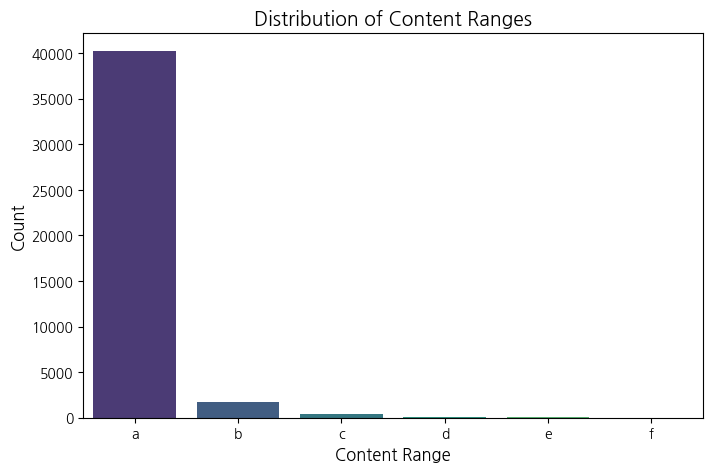

In [133]:
# content_range 컬럼별 개수 세기
category_counts = content_count_per_user['content_range'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# 그래프 설정
plt.xlabel("Content Range", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Content Ranges", fontsize=14)
plt.show()


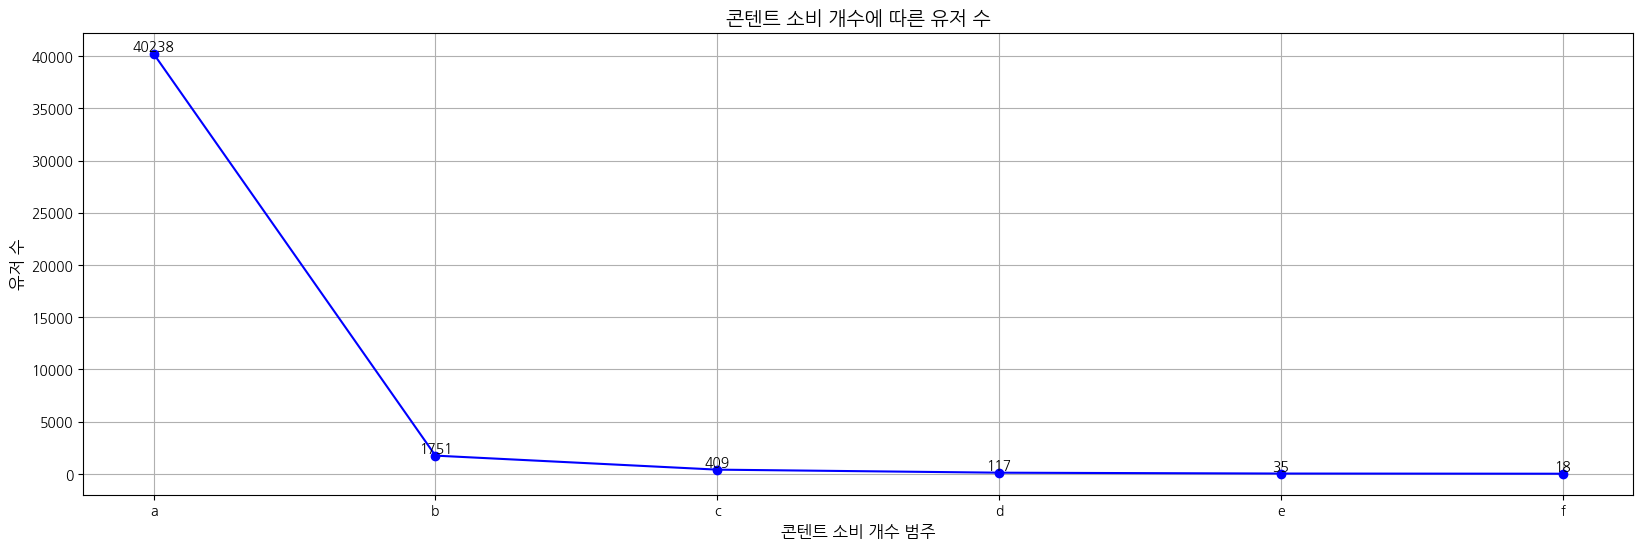

In [134]:
# 시각화
plt.figure(figsize=(20, 6))
plt.plot(category_counts.index, category_counts.values, marker='o', linestyle='-', color='b')

# 그래프 설정
plt.xlabel("콘텐트 소비 개수 범주", fontsize=12)
plt.ylabel("유저 수", fontsize=12)
plt.title("콘텐트 소비 개수에 따른 유저 수", fontsize=14)
plt.grid(True)  # 격자 추가

# 값 표시 (데이터 포인트 위에 숫자 표시)
for i, txt in enumerate(category_counts.values):
    plt.text(category_counts.index[i], category_counts.values[i] + 1, str(txt), ha='center', va='bottom', fontsize=10)

plt.show()


In [135]:
# 유저들은 한 달에 몇 번이나 접속했나(평균)
# 그룹바이이
start_content_user_monthly_counts = start_content_2022_2023.groupby(["user_id", "year_month"]).size().reset_index(name="monthly_count")

# 계산산
average_monthly_contents_per_user = start_content_user_monthly_counts.groupby("user_id")["monthly_count"].mean().reset_index()
average_monthly_contents_per_user.rename(columns={"monthly_count": "average_monthly_start_session_enter"}, inplace=True)
average_monthly_contents_per_user["average_monthly_start_session_enter"] = average_monthly_contents_per_user["average_monthly_start_session_enter"].round(2)

# 결과 출력
average_monthly_contents_per_user


,user_id,average_monthly_start_session_enter
0,0000572f2ba8079bcefd2760b632e820,1.50
1,000087537cbfd934375364218ff10f91,1.00
2,0001f15911b404f3bf5b8571afafa4e4,3.00
3,0003b028a745bdfda9e88539424248af,1.00
4,000509014329002768958b9210789b4b,1.00
...,...,...
42563,fff60192556898a9001de93f8708bedf,2.00
42564,fffadab35ddc8234e1c5139815bfc017,5.00
42565,fffcbf8ded60b689e9867bff455f4ab7,1.00
42566,fffe529de03d6187ef7ed765650c8d2b,3.17


In [136]:
average_monthly_contents_per_user.describe()

,average_monthly_start_session_enter
count,42568.000000
mean,1.722072
std,1.555307
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,51.000000


In [137]:
average_monthly_contents_per_user['average_monthly_start_session_enter'].mean().round(2)

1.72

In [138]:
start_content_2022_2023['user_id'].nunique()

42568

In [139]:
start_content_2022_2023.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty,year,year_month
0,Daejeon,2023-04-06 06:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner,2023,2023-04
1,Seoul,2023-04-06 06:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner,2023,2023-04
2,Seoul,2023-04-10 23:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner,2023,2023-04
3,Toronto,2023-04-10 23:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner,2023,2023-04
4,Seoul,2023-04-10 23:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced,2023,2023-04


In [140]:
click_cancel_plan_button = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/intermediate_project/data/click_cancel_plan_button.csv')
click_cancel_plan_button.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,NaN,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 08:32:39.271,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 11:36:28.311,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180


#### 레슨의 개수가 콘텐트 수강 완료율에 영향을 주나?

#### 난이도 비기너 ~~, 수치화 해야 하나? 옆에 컬럼 추가. (비기너 -> A, 하드 -> B 이런식으로)

In [141]:
# 데이터를 병합
merged_data_1 = pd.merge(
    start_content_2022_2023, 
    end_content_2022_2023, 
    on=['content_id', 'user_id'], 
    suffixes=('_start', '_end')
)

# 시작-완료 시간 차이
merged_data_1['time_difference'] = merged_data_1['client_event_time_end'] - merged_data_1['client_event_time_start']

# 각 lesson_id별 평균 시간
average_time_per_lesson = merged_data_1.groupby('content_id')['time_difference'].mean()

# 결과 출력
print(average_time_per_lesson)


content_id
03b4a290c08f7fa83933827a994f2e61    7 days 15:12:47.914586614
0ab2b890d4068c1490b89676773256f6   15 days 19:37:28.206084558
101e1d0dcc38d9c86156f008a145083e   15 days 17:42:15.600763546
123715e9b63b3efb32cdcd947ea96aaf   12 days 03:01:12.034787878
165def8885b8a2ec0c92404048d7e345   15 days 09:09:37.742082125
                                              ...            
f6f082e10dc9c1061cb809989b361d9c   16 days 02:28:21.967441441
f8b0ca043f5f0437603142ae93e6a424   18 days 14:20:30.530797468
fc3051206e08a57bc14fa52a7eec904b       4 days 10:06:20.282000
fc6a9e04f693ea724c55153d1ae82c65       0 days 00:48:48.410000
ff7998135d650dbefb3f479c900cbcc7    4 days 16:14:16.601402723
Name: time_difference, Length: 114, dtype: timedelta64[ns]


In [142]:
average_time_per_lesson_df = pd.DataFrame(average_time_per_lesson)

In [143]:
average_time_per_lesson_df.head()

,time_difference
content_id,
03b4a290c08f7fa83933827a994f2e61,7 days 15:12:47.914586614
0ab2b890d4068c1490b89676773256f6,15 days 19:37:28.206084558
101e1d0dcc38d9c86156f008a145083e,15 days 17:42:15.600763546
123715e9b63b3efb32cdcd947ea96aaf,12 days 03:01:12.034787878
165def8885b8a2ec0c92404048d7e345,15 days 09:09:37.742082125


In [144]:
average_time_per_lesson_df.sort_values(by = 'time_difference', ascending = True)

,time_difference
content_id,
16c90877db6d303e295cb27e74f55050,0 days 00:05:50.390000
7f3710876a1f7e774c5c39220bdb82d5,0 days 00:20:50.881000
fc6a9e04f693ea724c55153d1ae82c65,0 days 00:48:48.410000
6c1ab2ac2b70a203dad068301a9152a4,0 days 01:04:43.208021739
ed88bded4d552a42b70b65cf09e3943a,0 days 02:45:03.882666666
...,...
a914987711c7e2db9fd4bff7555ec87c,26 days 20:37:56.547694214
634f93f037bb2c534c2f99fdd16a04f0,31 days 08:52:09.127333333
db82104b9c508953b3d00eea82844a48,32 days 05:55:48.149315789


In [145]:
start_content_2022_2023.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty,year,year_month
0,Daejeon,2023-04-06 06:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner,2023,2023-04
1,Seoul,2023-04-06 06:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner,2023,2023-04
2,Seoul,2023-04-10 23:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner,2023,2023-04
3,Toronto,2023-04-10 23:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner,2023,2023-04
4,Seoul,2023-04-10 23:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced,2023,2023-04


#### 컨텐츠 완료 후 새 컨텐츠 시작 사이 기간

In [146]:
# 데이터 정렬 (user_id별 시간 순서대로)
start_content_2022_2023_a = start_content_2022_2023.sort_values(by=["user_id", "client_event_time"]).reset_index(drop=True)
end_content_2022_2023_a = end_content_2022_2023.sort_values(by=["user_id", "client_event_time"]).reset_index(drop=True)

# user_id 기준으로 데이터프레임 병합
merged = end_content_2022_2023_a.merge(start_content_2022_2023_a, on="user_id", suffixes=("_end", "_start"))

# 사용자가 완료한 컨텐츠 이후의 시작 컨텐츠 찾기
valid_mask = merged["client_event_time_start"] > merged["client_event_time_end"]
merged_filtered = merged[valid_mask]

# 각 end_content_2022_2023_a의 "다음 start_content_2022_2023_a"를 찾기 위해 groupby 후 최소값 찾기
next_start_times = merged_filtered.groupby(["user_id", "client_event_time_end"])["client_event_time_start"].min().reset_index()

# 원래 end_content_2022_2023_a와 병합해서 next_start_time 추가
end_content_2022_2023_a = end_content_2022_2023_a.merge(next_start_times, left_on=["user_id", "client_event_time"], right_on=["user_id", "client_event_time_end"], how="left")

# 시간 차이 계산
end_content_2022_2023_a["time_difference"] = (end_content_2022_2023_a["client_event_time_start"] - end_content_2022_2023_a["client_event_time"]).dt.total_seconds()

# 평균 시간 계산 (초 -> 분)
average_time = end_content_2022_2023_a["time_difference"].mean()
print(f"평균 컨텐츠 간 시간 차이: {average_time / 60:.2f} 분")


평균 컨텐츠 간 시간 차이: 46544.31 분


In [147]:
# # start.content와 end.content csv 파일 읽어오기
# start_content = datasets.start.content()
# end_content = datasets.end.content()

# start_content = start_content[['user_id','content.id','event_type','client_event_time']]
# end_content = end_content[['user_id','content.id','event_type','client_event_time']]

# # user_id와 content_id를 기준으로 시작시간과 완료시간을 구하기
# start_content['client_event_time'] = pd.to_datetime(start_content['client_event_time'])
# end_content['client_event_time'] = pd.to_datetime(end_content['client_event_time'])

# # 시작시간과 완료시간을 병합
# merged_content = pd.merge(start_content, end_content, on=['user_id','content.id'], how='left', suffixes=('_start', '_end'))

# # 정렬
# merged_content = merged_content.sort_values(by=['user_id','client_event_time_start'])

# # 다음 콘텐츠 시작 시간 계산
# merged_content['next_start_time'] = merged_content.groupby('user_id')['client_event_time_start'].shift(-1)

# # 콘텐츠 완료 시간과 다음 콘텐츠 시작 시간의 차이 계산
# merged_content['time_to_next_start'] = merged_content['next_start_time'] - merged_content['client_event_time_end']

# # 컨텐츠 완료 전에 다른 컨텐츠를 시작하는 경우를 제외하고자, 차이값을 0이상 필터링
# merged_content.loc[merged_content['time_to_next_start'] > pd.Timedelta(0) ,'time_to_next_start'].mean()